# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Eldon Parasian Simanjuntak
- **Email:** eldonparasian98@gmail.com
- **ID Dicoding:** eldonps

## Menentukan Pertanyaan Bisnis

- Pada bulan apa kualitas udara tertinggi dan terendah berdasarkan data PM10 di tahun 2013?
- Apakah terdapat korelasi antar jam operasi dengan kualitas udara berdasarkan PM 2.5 dan kadar O3 ?
- Bagaimana kadar O3 udara dari tahun ke tahun pada stasiun Guanyuan dan stasiun Gucheng ?

## Import Semua Packages/Library yang Digunakan

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [32]:
guan_df = pd.read_csv("Data\guanyuan_data.csv")
guan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [33]:
gucheng_df = pd.read_csv("Data\gucheng_data.csv")
gucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


### Assessing Data

#### Assesing data from Guanyuan Station

1. Menampilkan info guan_df

In [34]:
guan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


2. Mengecek apakah ada missing value pada data frame

In [35]:
guan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

3. Mengecek dan menampilkan jumlah duplikasi

In [36]:
print("Jumlah duplikasi: ", guan_df.duplicated().sum())

Jumlah duplikasi:  0


4. Memanggil fungsi describe untuk data fram Guanyuan

In [37]:
guan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


#### Assesing data from Gucheng Station

1. Menampilkan info dari data fram Gucheng Station

In [38]:
gucheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


2. Mengecek missing values pada data frame

In [39]:
gucheng_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

3. Mengecek jumlah duplikasi 

In [40]:
print("Jumlah duplikasi: ", gucheng_df.duplicated().sum())

Jumlah duplikasi:  0


4. Mendescribe data frame Gucheng Station

In [41]:
gucheng_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


### Cleaning Data

#### Cleaning Data for Guanyuan Station

1. Mendrop atau menghapus kolom dari SO2, NO2, TEMP, PRES, DEWP, RAIN, wd, WSPM. Karena kolom ini tidak digunakan

In [42]:
guan_df.drop(['SO2', 'NO2', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'], axis=1, inplace=True)

2. Memvisualisasi data frame setelah di drop

In [43]:
# Visualisasi Data Setelah Diganti
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

3. Mendescribe data frame setelah didrop

In [44]:
# describe data frame baru yang telah dihapus
guan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,CO,O3
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,33311.000000,33891.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,1271.294377,55.795044
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,1164.854945,57.436983
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,100.000000,0.214200
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,500.000000,7.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,900.000000,41.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,1600.000000,81.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,10000.000000,415.000000


4. Mengecek data types pada data frame

In [45]:
data_types = guan_df.dtypes

# Periksa apakah semua tipe data sama
if data_types.nunique() == 1:
    print("Semua tipe data sama untuk setiap fitur.")
    print("Tipe data:", data_types.unique()[0])
else:
    print("Tipe data berbeda pada beberapa fitur.")
    print("Tipe data pada setiap fitur:")
    print(data_types)

Tipe data berbeda pada beberapa fitur.
Tipe data pada setiap fitur:
No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
CO         float64
O3         float64
station     object
dtype: object


5. Mengecek ulang missing values

In [46]:
guan_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
CO         1753
O3         1173
station       0
dtype: int64

6. Memperbaiki data frame yang memiliki missing values dengan melalukan imputasi pada kolom nilai yang kosong 

In [47]:
pm25_mean = guan_df['PM2.5'].mean()
guan_df['PM2.5'].fillna(pm25_mean, inplace=True)

pm10_mean = guan_df['PM10'].mean()
guan_df['PM10'].fillna(pm10_mean, inplace=True)

# Melakukan imputasi pada kolom O3
co_mean = guan_df['CO'].mean()
guan_df['CO'].fillna(co_mean, inplace=True)

o3_mean = guan_df['O3'].mean()
guan_df['O3'].fillna(o3_mean, inplace=True)


7. Mengecek ulang missing values sekaligus memastikan apakah sudah tidak ada yang missing lagi

In [48]:
guan_df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
CO         0
O3         0
station    0
dtype: int64

8. Mengidentifikasi outlier dengan IQR

In [49]:
# Hitung Q1 dan Q3
Q1 = guan_df['PM2.5'].quantile(0.25)
Q3 = guan_df['PM2.5'].quantile(0.75)

# Hitung IQR
IQR = Q3 - Q1

# Tentukan batas atas dan batas bawah
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outlier
outliers = guan_df[(guan_df['PM2.5'] < lower_bound) | (guan_df['PM2.5'] > upper_bound)]

print("Outliers:")
print(outliers)


Outliers:
          No  year  month  day  hour  PM2.5   PM10      CO    O3   station
153      154  2013      3    7     9  262.0  342.0  5900.0  12.0  Guanyuan
154      155  2013      3    7    10  278.0  333.0  5000.0  12.0  Guanyuan
155      156  2013      3    7    11  280.0  299.0  5299.0  12.0  Guanyuan
156      157  2013      3    7    12  289.0  328.0  5700.0  12.0  Guanyuan
157      158  2013      3    7    13  297.0  344.0  3700.0  29.0  Guanyuan
...      ...   ...    ...  ...   ...    ...    ...     ...   ...       ...
34754  34755  2017      2   16     2  262.0  262.0  2000.0  61.0  Guanyuan
34755  34756  2017      2   16     3  259.0  259.0  3000.0  61.0  Guanyuan
34756  34757  2017      2   16     4  260.0  260.0  2700.0  61.0  Guanyuan
34757  34758  2017      2   16     5  252.0  252.0  2600.0  61.0  Guanyuan
34758  34759  2017      2   16     6  250.0  250.0  2800.0  61.0  Guanyuan

[1650 rows x 10 columns]


9. Menghapus outlier

In [50]:
# Hapus outlier
guan_df_cleaned = guan_df[(guan_df['PM2.5'] >= lower_bound) & (guan_df['PM2.5'] <= upper_bound)]

# Cetak informasi tentang outlier yang dihapus
outliers_removed = guan_df.shape[0] - guan_df_cleaned.shape[0]
print(f"Jumlah outlier yang dihapus: {outliers_removed}")
print(guan_df_cleaned)
# Sekarang, guan_df_cleaned adalah DataFrame yang tidak mengandung outlier pada kolom 'PM2.5'


Jumlah outlier yang dihapus: 1650
          No  year  month  day  hour  PM2.5  PM10     CO    O3   station
0          1  2013      3    1     0    4.0   4.0  300.0  69.0  Guanyuan
1          2  2013      3    1     1    4.0   4.0  300.0  72.0  Guanyuan
2          3  2013      3    1     2    3.0   3.0  300.0  69.0  Guanyuan
3          4  2013      3    1     3    3.0   6.0  400.0  62.0  Guanyuan
4          5  2013      3    1     4    3.0   6.0  400.0  71.0  Guanyuan
...      ...   ...    ...  ...   ...    ...   ...    ...   ...       ...
35059  35060  2017      2   28    19   13.0  37.0  400.0  60.0  Guanyuan
35060  35061  2017      2   28    20   20.0  43.0  500.0  43.0  Guanyuan
35061  35062  2017      2   28    21   16.0  33.0  500.0  50.0  Guanyuan
35062  35063  2017      2   28    22   11.0  24.0  500.0  41.0  Guanyuan
35063  35064  2017      2   28    23   15.0  27.0  600.0  33.0  Guanyuan

[33414 rows x 10 columns]


10. menampilkan data frame bagian head

In [51]:
guan_df.head()

,No,year,month,day,hour,PM2.5,PM10,CO,O3,station
0,1,2013,3,1,0,4.0,4.0,300.0,69.0,Guanyuan
1,2,2013,3,1,1,4.0,4.0,300.0,72.0,Guanyuan
2,3,2013,3,1,2,3.0,3.0,300.0,69.0,Guanyuan
3,4,2013,3,1,3,3.0,6.0,400.0,62.0,Guanyuan
4,5,2013,3,1,4,3.0,6.0,400.0,71.0,Guanyuan


#### Cleaning data for Gucheng Station

1. Mendrop atau menghapus kolom dari SO2, NO2, TEMP, PRES, DEWP, RAIN, wd, WSPM. Karena kolom ini tidak digunakan

In [52]:
gucheng_df.drop(['SO2', 'NO2', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'], axis=1,inplace=True)

2. Memvisualisasi data frame setelah di drop

In [53]:
# Visualisasi Data Setelah Diganti
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

3. Mendescribe data frame setelah didrop

In [54]:
# describe data frame baru yang telah dihapus
gucheng_df.describe()

,No,year,month,day,hour,PM2.5,PM10,CO,O3
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,33663.000000,34335.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,1323.974423,57.694879
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,1208.957772,57.019587
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,100.000000,0.214200
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,600.000000,10.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,900.000000,45.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,1600.000000,83.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,10000.000000,450.000000


4. Mengecek data types pada data frame

In [55]:
data_types = gucheng_df.dtypes

# Periksa apakah semua tipe data sama
if data_types.nunique() == 1:
    print("Semua tipe data sama untuk setiap fitur.")
    print("Tipe data:", data_types.unique()[0])
else:
    print("Tipe data berbeda pada beberapa fitur.")
    print("Tipe data pada setiap fitur:")
    print(data_types)

Tipe data berbeda pada beberapa fitur.
Tipe data pada setiap fitur:
No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
CO         float64
O3         float64
station     object
dtype: object


5. Mengecek ulang missing values

In [56]:
gucheng_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
CO         1401
O3          729
station       0
dtype: int64

6. Memperbaiki data frame yang memiliki missing values dengan melalukan imputasi pada kolom nilai yang kosong

In [57]:
pm25_mean = gucheng_df['PM2.5'].mean()
gucheng_df['PM2.5'].fillna(pm25_mean, inplace=True)

pm10_mean = gucheng_df['PM10'].mean()
gucheng_df['PM10'].fillna(pm10_mean, inplace=True)

# Melakukan imputasi pada kolom O3
co_mean = gucheng_df['CO'].mean()
gucheng_df['CO'].fillna(co_mean, inplace=True)

o3_mean = gucheng_df['O3'].mean()
gucheng_df['O3'].fillna(o3_mean, inplace=True)

gucheng_df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
CO         0
O3         0
station    0
dtype: int64

7. Mengidentifikasi outlier dengan IQR

In [58]:
# Hitung Q1 dan Q3
Q1 = gucheng_df['PM2.5'].quantile(0.25)
Q3 = gucheng_df['PM2.5'].quantile(0.75)

# Hitung IQR
IQR = Q3 - Q1

# Tentukan batas atas dan batas bawah
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outlier
outliers = gucheng_df[(gucheng_df['PM2.5'] < lower_bound) | (gucheng_df['PM2.5'] > upper_bound)]

print("Outliers:")
print(outliers)

Outliers:
          No  year  month  day  hour  PM2.5   PM10      CO    O3  station
140      141  2013      3    6    20  248.0  320.0  3700.0  26.0  Gucheng
141      142  2013      3    6    21  287.0  349.0  4099.0  26.0  Gucheng
142      143  2013      3    6    22  292.0  347.0  4299.0  26.0  Gucheng
143      144  2013      3    6    23  272.0  329.0  4799.0  26.0  Gucheng
144      145  2013      3    7     0  279.0  373.0  5200.0  26.0  Gucheng
...      ...   ...    ...  ...   ...    ...    ...     ...   ...      ...
34755  34756  2017      2   16     3  271.0  271.0  3300.0  74.0  Gucheng
34756  34757  2017      2   16     4  262.0  262.0  3200.0  74.0  Gucheng
34757  34758  2017      2   16     5  264.0  264.0  3100.0  74.0  Gucheng
34758  34759  2017      2   16     6  258.0  258.0  3000.0  74.0  Gucheng
34759  34760  2017      2   16     7  257.0  257.0  3000.0   2.0  Gucheng

[1704 rows x 10 columns]


8. Menghapus outlier

In [59]:
# Hapus outlier
gucheng_df_cleaned = gucheng_df[(gucheng_df['PM2.5'] >= lower_bound) & (gucheng_df['PM2.5'] <= upper_bound)]

# Cetak informasi tentang outlier yang dihapus
outliers_removed = gucheng_df.shape[0] - gucheng_df_cleaned.shape[0]
print(f"Jumlah outlier yang dihapus: {outliers_removed}")
print(gucheng_df_cleaned)
# Sekarang, guan_df_cleaned adalah DataFrame yang tidak mengandung outlier pada kolom 'PM2.5'

gucheng_df.head()

Jumlah outlier yang dihapus: 1704
          No  year  month  day  hour  PM2.5  PM10           CO         O3  \
0          1  2013      3    1     0    6.0  18.0   800.000000  88.000000   
1          2  2013      3    1     1    6.0  15.0   800.000000  88.000000   
2          3  2013      3    1     2    5.0  18.0   700.000000  52.000000   
3          4  2013      3    1     3    6.0  20.0  1323.974423  57.694879   
4          5  2013      3    1     4    5.0  17.0   600.000000  73.000000   
...      ...   ...    ...  ...   ...    ...   ...          ...        ...   
35059  35060  2017      2   28    19   14.0  58.0   500.000000  56.000000   
35060  35061  2017      2   28    20   27.0  83.0   700.000000  26.000000   
35061  35062  2017      2   28    21   22.0  37.0   600.000000  27.000000   
35062  35063  2017      2   28    22    9.0  23.0   400.000000  57.000000   
35063  35064  2017      2   28    23   12.0  48.0   600.000000  28.000000   

       station  
0      Gucheng  
1      

,No,year,month,day,hour,PM2.5,PM10,CO,O3,station
0,1,2013,3,1,0,6.0,18.0,800.000000,88.000000,Gucheng
1,2,2013,3,1,1,6.0,15.0,800.000000,88.000000,Gucheng
2,3,2013,3,1,2,5.0,18.0,700.000000,52.000000,Gucheng
3,4,2013,3,1,3,6.0,20.0,1323.974423,57.694879,Gucheng
4,5,2013,3,1,4,5.0,17.0,600.000000,73.000000,Gucheng


## Exploratory Data Analysis (EDA)

### Explorasi guanyuan stasiun dan gucheng stasiun

1. Mengupdate data frame dengan data frame yang telah di hapus

In [60]:
guan_df.update(guan_df_cleaned)
gucheng_df.update(gucheng_df_cleaned)

2. Mendescribe data frame Guanyuan Station dengan parameter include all

In [61]:
guan_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,CO,O3,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Guanyuan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,1271.294377,55.795044,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.219412,91.011777,1135.362716,56.468060,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,100.000000,0.214200,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,41.000000,600.000000,8.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,90.000000,1000.000000,44.000000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,148.000000,1500.000000,79.000000,NaN


3. Mendescribe data frame Gucheng Station dengan parameter include all

In [62]:
gucheng_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,CO,O3,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gucheng
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,1323.974423,57.694879,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.030179,96.215580,1184.558610,56.423722,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,100.000000,0.214200,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,25.000000,46.000000,600.000000,10.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,101.000000,1000.000000,46.000000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,166.000000,1600.000000,82.000000,NaN


4. Menampilkan head, tail ,info dari data frame Guanyuan Station

In [63]:
print(guan_df.head())
print(guan_df.tail())
print(guan_df.info())


   No  year  month  day  hour  PM2.5  PM10     CO    O3   station
0   1  2013      3    1     0    4.0   4.0  300.0  69.0  Guanyuan
1   2  2013      3    1     1    4.0   4.0  300.0  72.0  Guanyuan
2   3  2013      3    1     2    3.0   3.0  300.0  69.0  Guanyuan
3   4  2013      3    1     3    3.0   6.0  400.0  62.0  Guanyuan
4   5  2013      3    1     4    3.0   6.0  400.0  71.0  Guanyuan
          No  year  month  day  hour  PM2.5  PM10     CO    O3   station
35059  35060  2017      2   28    19   13.0  37.0  400.0  60.0  Guanyuan
35060  35061  2017      2   28    20   20.0  43.0  500.0  43.0  Guanyuan
35061  35062  2017      2   28    21   16.0  33.0  500.0  50.0  Guanyuan
35062  35063  2017      2   28    22   11.0  24.0  500.0  41.0  Guanyuan
35063  35064  2017      2   28    23   15.0  27.0  600.0  33.0  Guanyuan
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   -----

5. Mendescribe data frame Guanyuan Station hanya menggunakan kolom PM10

In [64]:
print(guan_df['PM10'].describe())


count    35064.000000
mean       109.023303
std         91.011777
min          2.000000
25%         41.000000
50%         90.000000
75%        148.000000
max        999.000000
Name: PM10, dtype: float64


6. Mengelompokan data frame Guanyuan Station berdasarkan rata-rata PM10 pada setiap Bulan

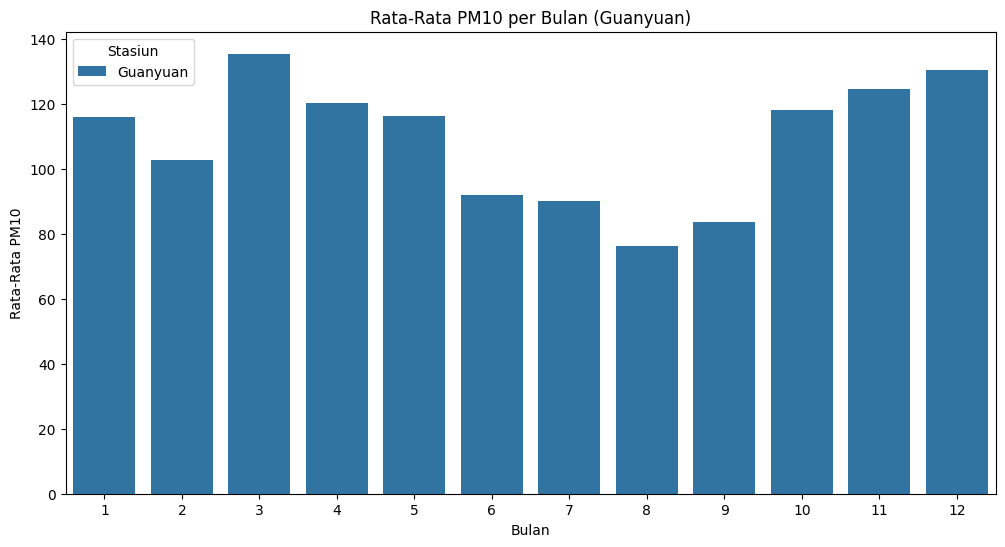

In [73]:
# Kelompokkan data berdasarkan bulan dan hitung rata-rata PM10
monthly_pm10 = guan_df.groupby(['month', 'station'])['PM10'].mean().reset_index()

# Visualisasikan data
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='PM10', hue='station', data=monthly_pm10)
plt.title('Rata-Rata PM10 per Bulan (Guanyuan)')
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata PM10')
plt.legend(title='Stasiun')
plt.show()

7. Menampikan distribusi data PM10 pada Guanyuan Station di tahun 2013

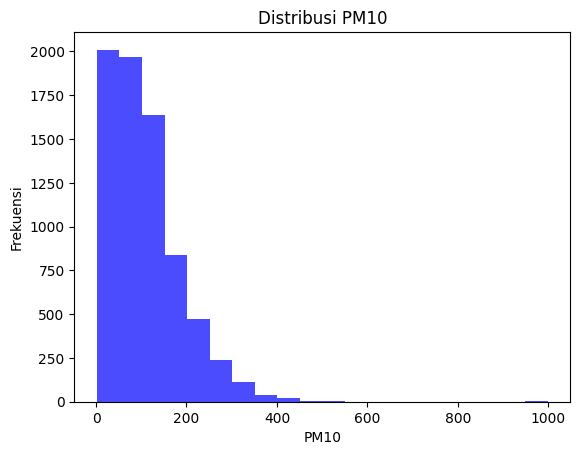

In [75]:
guan_df_2013 = guan_df[(guan_df['station'] == 'Guanyuan') & (guan_df['year'] == 2013)]

plt.hist(guan_df_2013['PM10'], bins=20, color='blue', alpha=0.7)
plt.title('Distribusi PM10')
plt.xlabel('PM10')
plt.ylabel('Frekuensi')
plt.show()


8. Mencoba melakukan analisis menggunakan RFM tetapi mengganti monetary menjadi quality, karena dalam konteks dataset ini merupahkan kualitas udara

In [89]:
# Menghitung Recency (bulan terbaru)
recency = guan_df_2013['month'].max()

# Menghitung Frequency (jumlah kali PM2.5 diukur dalam setiap bulan)
frequency = guan_df_2013.groupby('month')['PM10'].count()

# Menghitung Quality (rata-rata PM2.5 dalam setiap bulan)
quality = guan_df_2013.groupby('month')['PM10'].mean()

# Menggabungkan hasil analisis RFQ ke dalam satu DataFrame
rfq_analysis = pd.DataFrame({
    'Recency': [recency] * len(frequency),  # Repeat recency to match length
    'Frequency': frequency,
    'Quality': quality
})


## Visualization & Explanatory Analysis

### Petanyaan 1: Pada bulan apa kualitas udara tertinggi dan terendah berdasarkan data PM10 di tahun 2013?


#### 1.1 Menggunakan RFM dengan modifikasi Monetary menjadi Quality

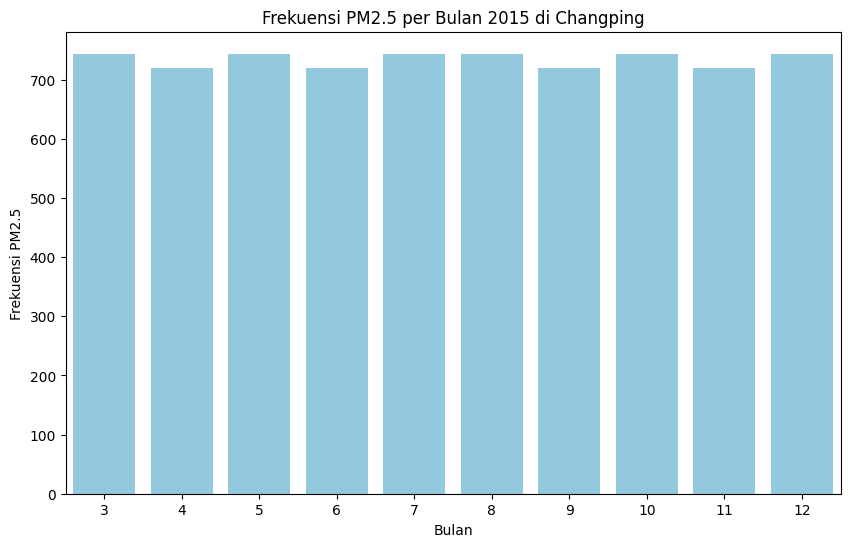

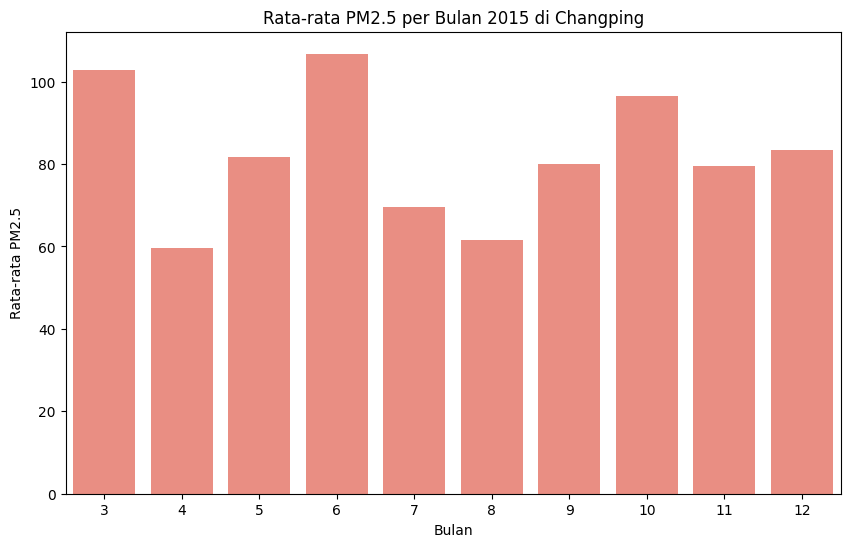

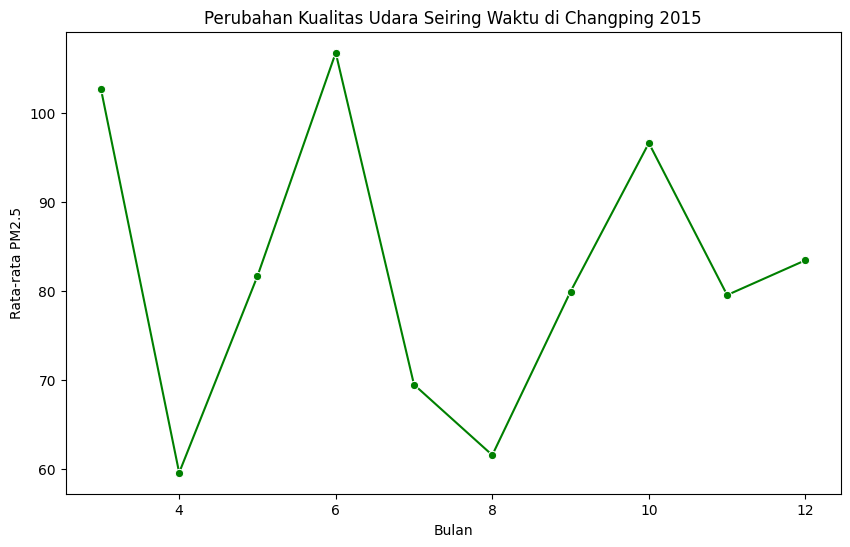

In [90]:
# Visualisasi Frekuensi PM10 per Bulan
plt.figure(figsize=(10, 6))
sns.barplot(data=rfq_analysis, x=rfq_analysis.index, y='Frequency', color='skyblue')
plt.title('Frekuensi PM10 per Bulan 2013 di Guanyuan')
plt.xlabel('Bulan')
plt.ylabel('Frekuensi PM10')
plt.show()

# Visualisasi Rata-rata PM10 per Bulan
plt.figure(figsize=(10, 6))
sns.barplot(data=rfq_analysis, x=rfq_analysis.index, y='Quality', color='salmon')
plt.title('Rata-rata PM10 per Bulan 2013 di Guanyuan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata PM10')
plt.show()

# Visualisasi Perubahan Kualitas Udara Seiring Waktu
plt.figure(figsize=(10, 6))
sns.lineplot(data=rfq_analysis, x=rfq_analysis.index, y='Quality', marker='o', color='green')
plt.title('Perubahan Kualitas Udara Seiring Waktu di Guanyuan 2013')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata PM10')
plt.show()

#### 1.2 Menggunakan Plot tren bulanan lalu mencari nilai tertinggi dan terendah dari rata-rata PM10

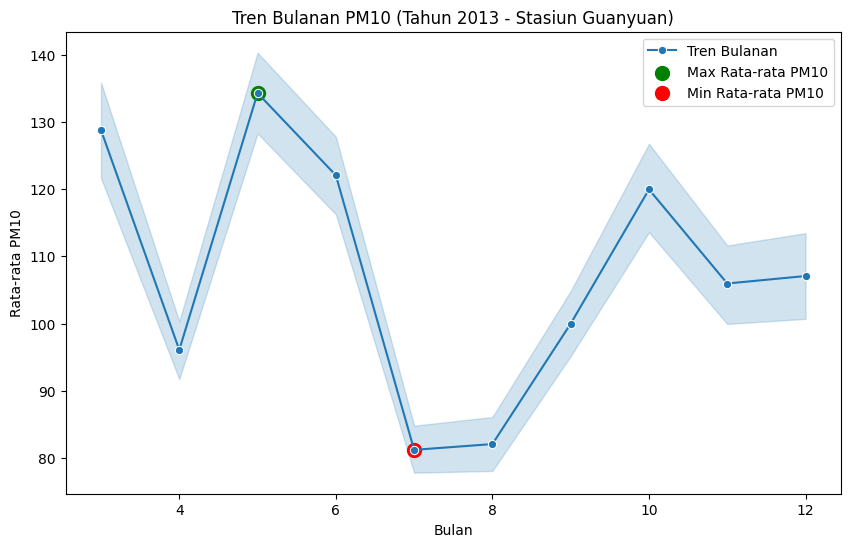

In [74]:
max_avg_pm10_per_month = guan_df_2013.groupby('month')['PM10'].mean().idxmax()
max_avg_pm10_value = guan_df_2013.groupby('month')['PM10'].mean().max()

min_avg_pm10_per_month = guan_df_2013.groupby('month')['PM10'].mean().idxmin()
min_avg_pm10_value = guan_df_2013.groupby('month')['PM10'].mean().min()

# Plot tren bulanan
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='PM10', data=guan_df_2013, marker='o', label='Tren Bulanan')

# Menandai titik rata-rata PM10 tertinggi dan terendah
plt.scatter(x=max_avg_pm10_per_month, y=max_avg_pm10_value, color='green', s=100, label='Max Rata-rata PM10')
plt.scatter(x=min_avg_pm10_per_month, y=min_avg_pm10_value, color='red', s=100, label='Min Rata-rata PM10')

plt.title('Tren Bulanan PM10 (Tahun 2013 - Stasiun Guanyuan)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata PM10')
plt.legend()
plt.show()

### Pertanyaan 2: Bagaimana hubungan antar jam operasi dengan kualitas udara berdasarkan PM 2.5 dan kadar O3 ?

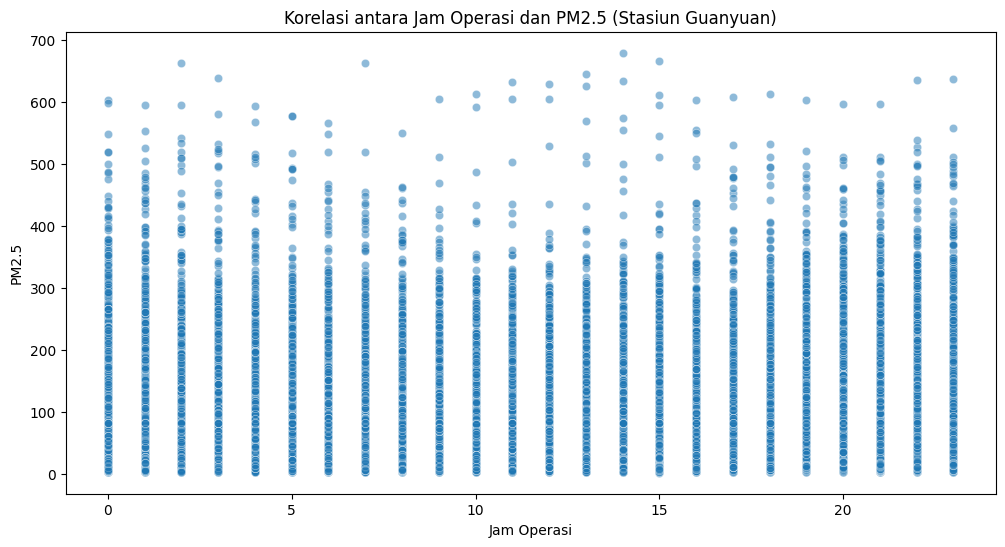

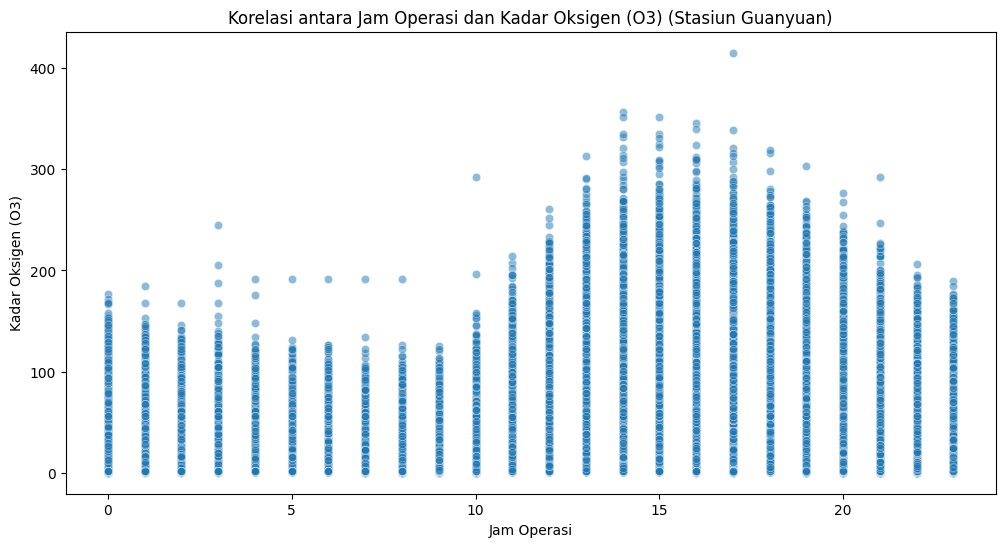

In [66]:
# Visualisasi korelasi antara jam operasi dan PM2.5
plt.figure(figsize=(12, 6))
sns.scatterplot(x='hour', y='PM2.5', data=guan_df, alpha=0.5)
plt.title('Korelasi antara Jam Operasi dan PM2.5 (Stasiun Guanyuan)')
plt.xlabel('Jam Operasi')
plt.ylabel('PM2.5')
plt.show()

# Visualisasi korelasi antara jam operasi dan kadar O3 (O3)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='hour', y='O3', data=guan_df, alpha=0.5)
plt.title('Korelasi antara Jam Operasi dan Kadar O3 (O3) (Stasiun Guanyuan)')
plt.xlabel('Jam Operasi')
plt.ylabel('Kadar O3 (O3)')
plt.show()


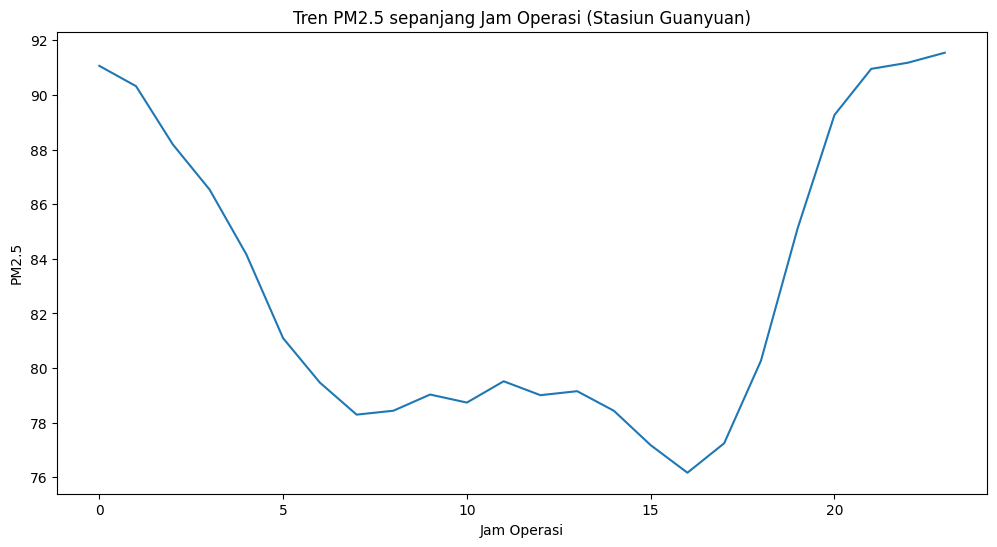

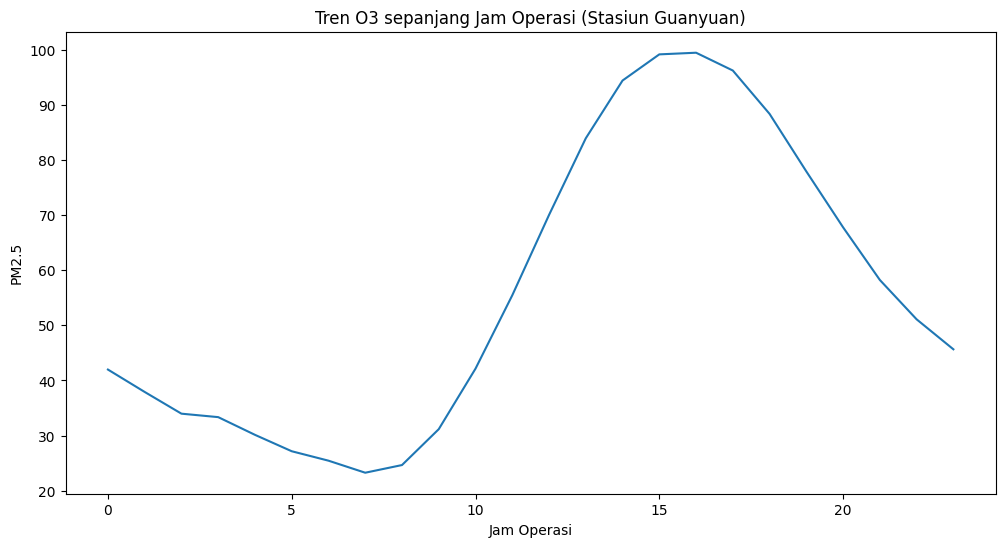

In [84]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='PM2.5', data=guan_df, errorbar=None)
plt.title('Tren PM2.5 sepanjang Jam Operasi (Stasiun Guanyuan)')
plt.xlabel('Jam Operasi')
plt.ylabel('PM2.5')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='O3', data=guan_df, errorbar=None)
plt.title('Tren O3 sepanjang Jam Operasi (Stasiun Guanyuan)')
plt.xlabel('Jam Operasi')
plt.ylabel('PM2.5')
plt.show()


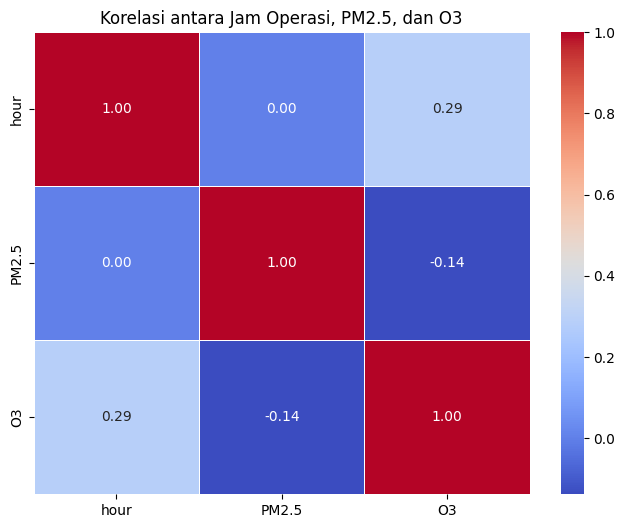

In [78]:
correlation_matrix = guan_df[['hour', 'PM2.5', 'O3']].corr()

# Visualisasikan korelasi matriks menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Korelasi antara Jam Operasi, PM2.5, dan O3')
plt.show()

### Pertanyaan 3: Bagaimana kadar O3 udara dari tahun ke tahun pada stasiun Guanyuan dan stasiun Gucheng ?

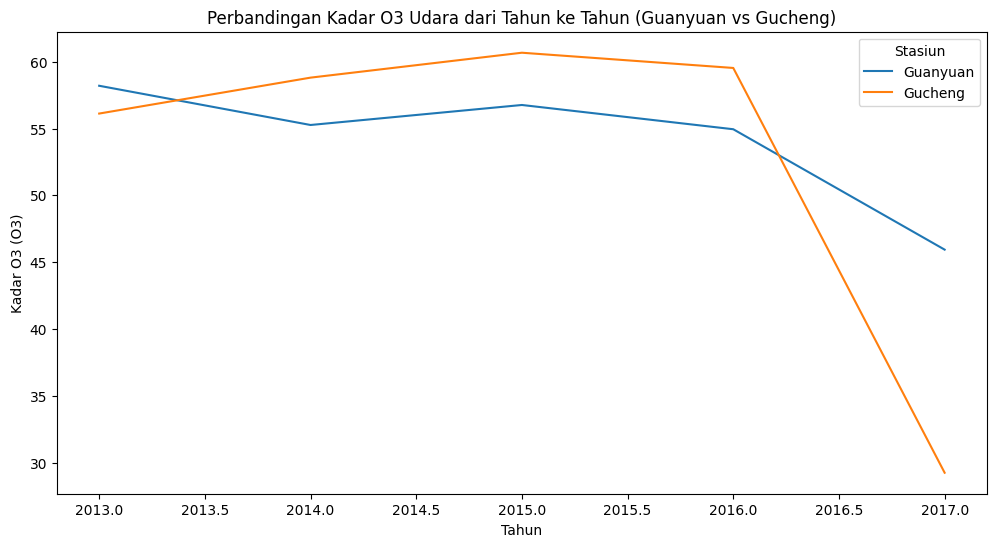

In [76]:
combined_df = pd.concat([guan_df, gucheng_df])

# Visualisasi kadar O3 udara dari tahun ke tahun untuk kedua stasiun dalam satu plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='O3', hue='station', data=combined_df, err_style=None)
plt.title('Perbandingan Kadar O3 Udara dari Tahun ke Tahun (Guanyuan vs Gucheng)')
plt.xlabel('Tahun')
plt.ylabel('Kadar O3 (O3)')
plt.legend(title='Stasiun')
plt.show()

In [85]:
class DataRetriever:
    def __init__(self, guan_df, gucheng_df):
        self.guan_df = guan_df
        self.gucheng_df = gucheng_df

    def get_guan_data(self):
        return self.guan_df

    def get_gucheng_data(self):
        return self.gucheng_df


## Conclusion

- Conclusion pertanyaan 1: Dari grafik tren bulanan yang telah divisulisasikan diatas terlihat bahwa ada terdapat perbedaan signikan kualitas PM10 pada setiap bulannya. Dimana nilai rata-rata PM10 tertinggi ada pada bulan 5 atau bulan Mei dan terendah pada bulan 7 atau bulan Juli. 

- Conclusion pertanyaan 2: Berdasarkan grafik korelasi diatas dapat disimpulkan bahwa tidak ada korelasi antar jam operasi (hour), Kadar PM2.5 (PM2.5), dan kadar O3 (O3). Namun, dari grafi tren sepanjang operasi disitu dapat disimpulakan bahwa Kadar PM2.5 tertinggi ada pada pagi hari dan malam hari, sedangkan kadar O3 tertinggi ada pada siang hingga malam hari

- Conclusion pertanyaan 3: Berdasarkan grafik diatas didapatkan bawhwa kadar 03 tahun ke tahun di stasiun Guanyuan dan stasiun Gucheng mengalami penurunan yang cukup signifikan.